### **E-commerceCustomerChurn**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### **Understanding the dataset**

In [ ]:
df.shape

(5630, 20)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode

the values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

the values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




### **Handling the Missing Values**

In [ ]:
df1=df.copy()

In [ ]:
df.drop(['CustomerID'],axis=1, inplace=True)

In [ ]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

Tenure
the total null values are: 264
the datatype is float64

WarehouseToHome
the total null values are: 251
the datatype is float64

HourSpendOnApp
the total null values are: 255
the datatype is float64

OrderAmountHikeFromlastYear
the total null values are: 265
the datatype is float64

CouponUsed
the total null values are: 256
the datatype is float64

OrderCount
the total null values are: 258
the datatype is float64

DaySinceLastOrder
the total null values are: 307
the datatype is float64



In [ ]:
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00


In [ ]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

### **Outlier Treatment**

Text(0, 0.5, 'Values')

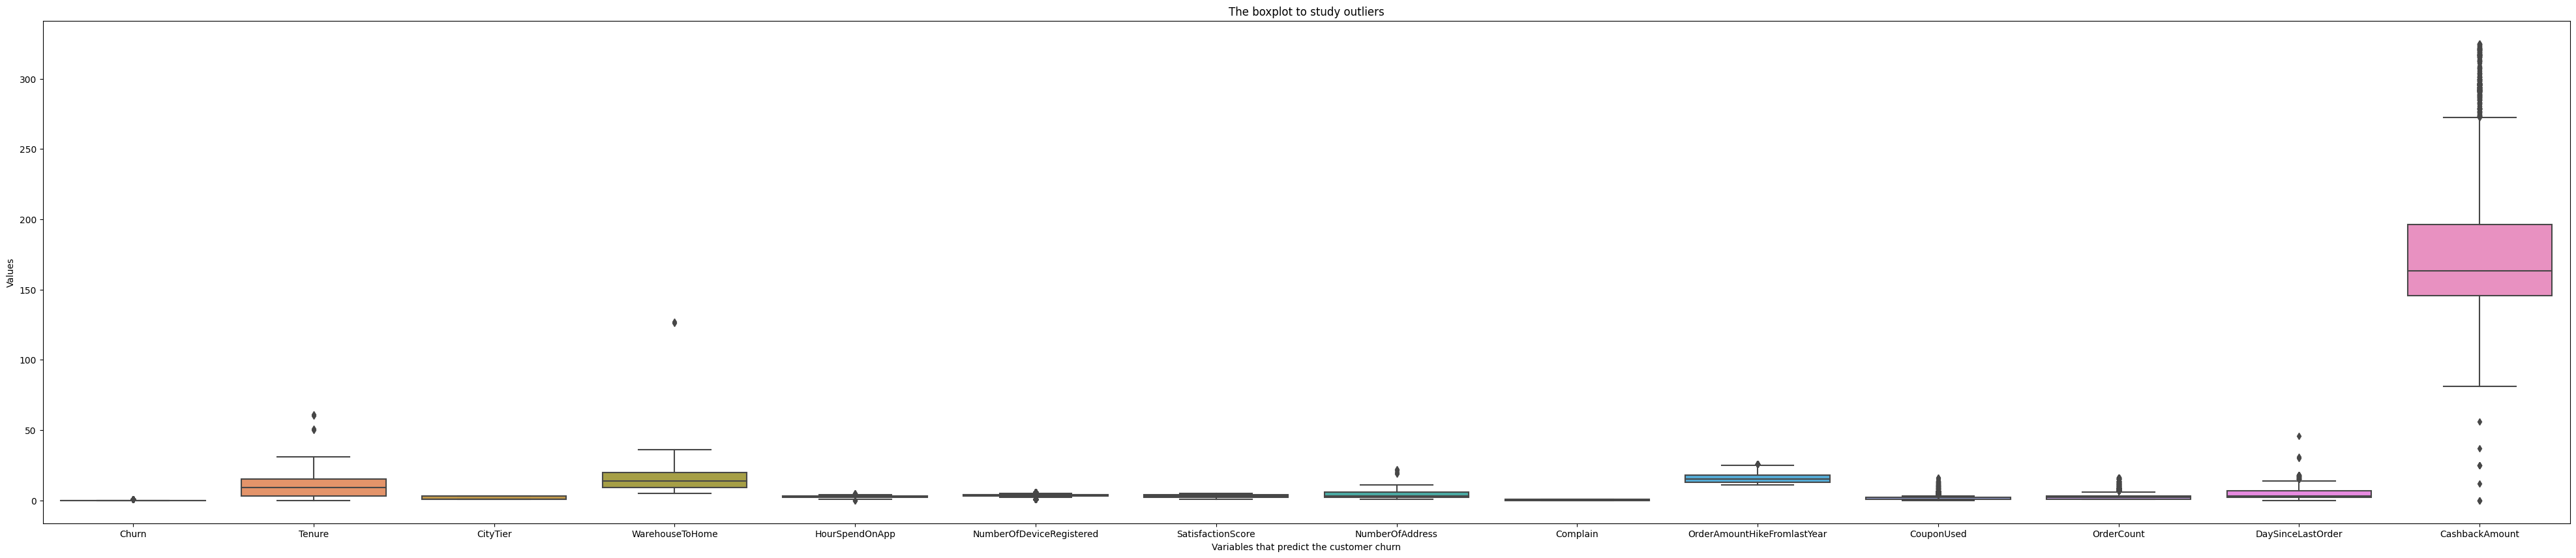

In [ ]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [ ]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

Text(0, 0.5, 'Values')

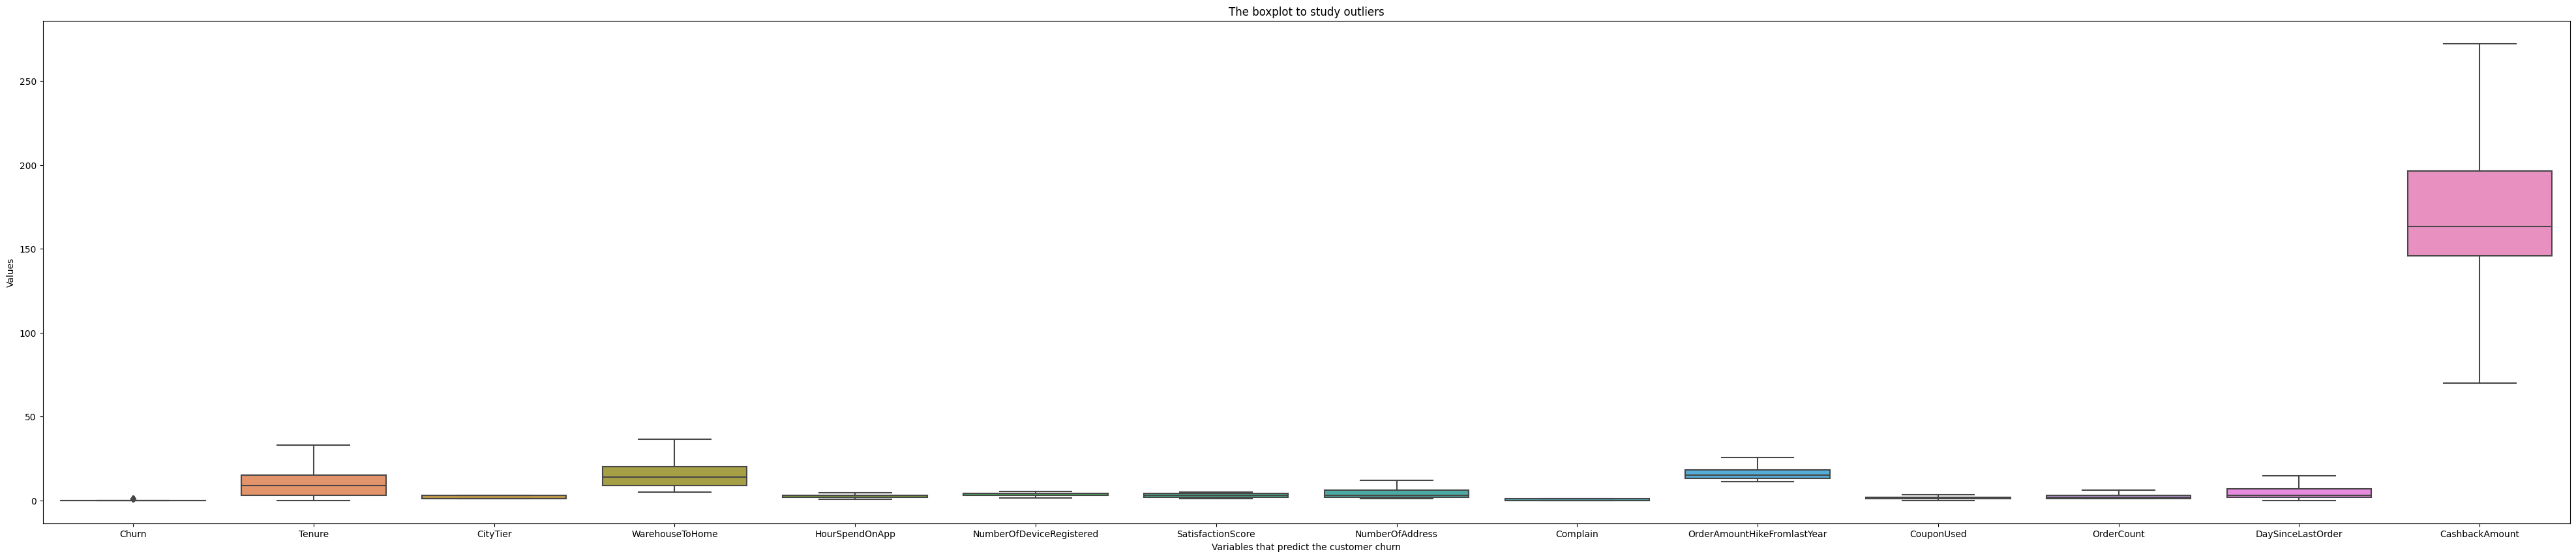

In [ ]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

### **Feature Engineering - Adding new variables**

In [ ]:
df['avg_cashbk_per_order'] = df['CashbackAmount'] / df['OrderCount']

In [ ]:
Churn_perc = round((df['Churn'][df['Churn']==1].count()*100/df['Churn'][df['Churn']==0].count()),2)

In [ ]:
print('The average customer churn is:', Churn_perc,'%')


The average customer churn is: 20.25 %


### **The Univariate Analysis**

In [ ]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num =  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'avg_cashbk_per_order']


In [ ]:
df[cat].describe().T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [ ]:
for i in cat:
    print(i)
    print()
    print(df[i].value_counts())
    print()
    print()

Churn

0    4682
1     948
Name: Churn, dtype: int64


PreferredLoginDevice

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


CityTier

1    3666
3    1722
2     242
Name: CityTier, dtype: int64


PreferredPaymentMode

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [ ]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.118117,8.291334,0.000000,3.000000,9.00,15.0000,33.00000
WarehouseToHome,5630.0,15.534813,8.089328,5.000000,9.000000,14.00,20.0000,36.50000
HourSpendOnApp,5630.0,2.934636,0.703826,0.500000,2.000000,3.00,3.0000,4.50000
NumberOfDeviceRegistered,5630.0,3.695471,0.942015,1.500000,3.000000,4.00,4.0000,5.50000
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.000000,3.00,4.0000,5.00000
NumberOfAddress,5630.0,4.207993,2.555111,1.000000,2.000000,3.00,6.0000,12.00000
Complain,5630.0,0.284902,0.451408,0.000000,0.000000,0.00,1.0000,1.00000
OrderAmountHikeFromlastYear,5630.0,15.671670,3.582823,11.000000,13.000000,15.00,18.0000,25.50000
CouponUsed,5630.0,1.440409,1.071295,0.000000,1.000000,1.00,2.0000,3.50000
OrderCount,5630.0,2.520604,1.711109,1.000000,1.000000,2.00,3.0000,6.00000


array([[<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'WarehouseToHome'}>,
        <Axes: title={'center': 'HourSpendOnApp'}>,
        <Axes: title={'center': 'NumberOfDeviceRegistered'}>],
       [<Axes: title={'center': 'SatisfactionScore'}>,
        <Axes: title={'center': 'NumberOfAddress'}>,
        <Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'OrderAmountHikeFromlastYear'}>],
       [<Axes: title={'center': 'CouponUsed'}>,
        <Axes: title={'center': 'OrderCount'}>,
        <Axes: title={'center': 'DaySinceLastOrder'}>,
        <Axes: title={'center': 'CashbackAmount'}>],
       [<Axes: title={'center': 'avg_cashbk_per_order'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

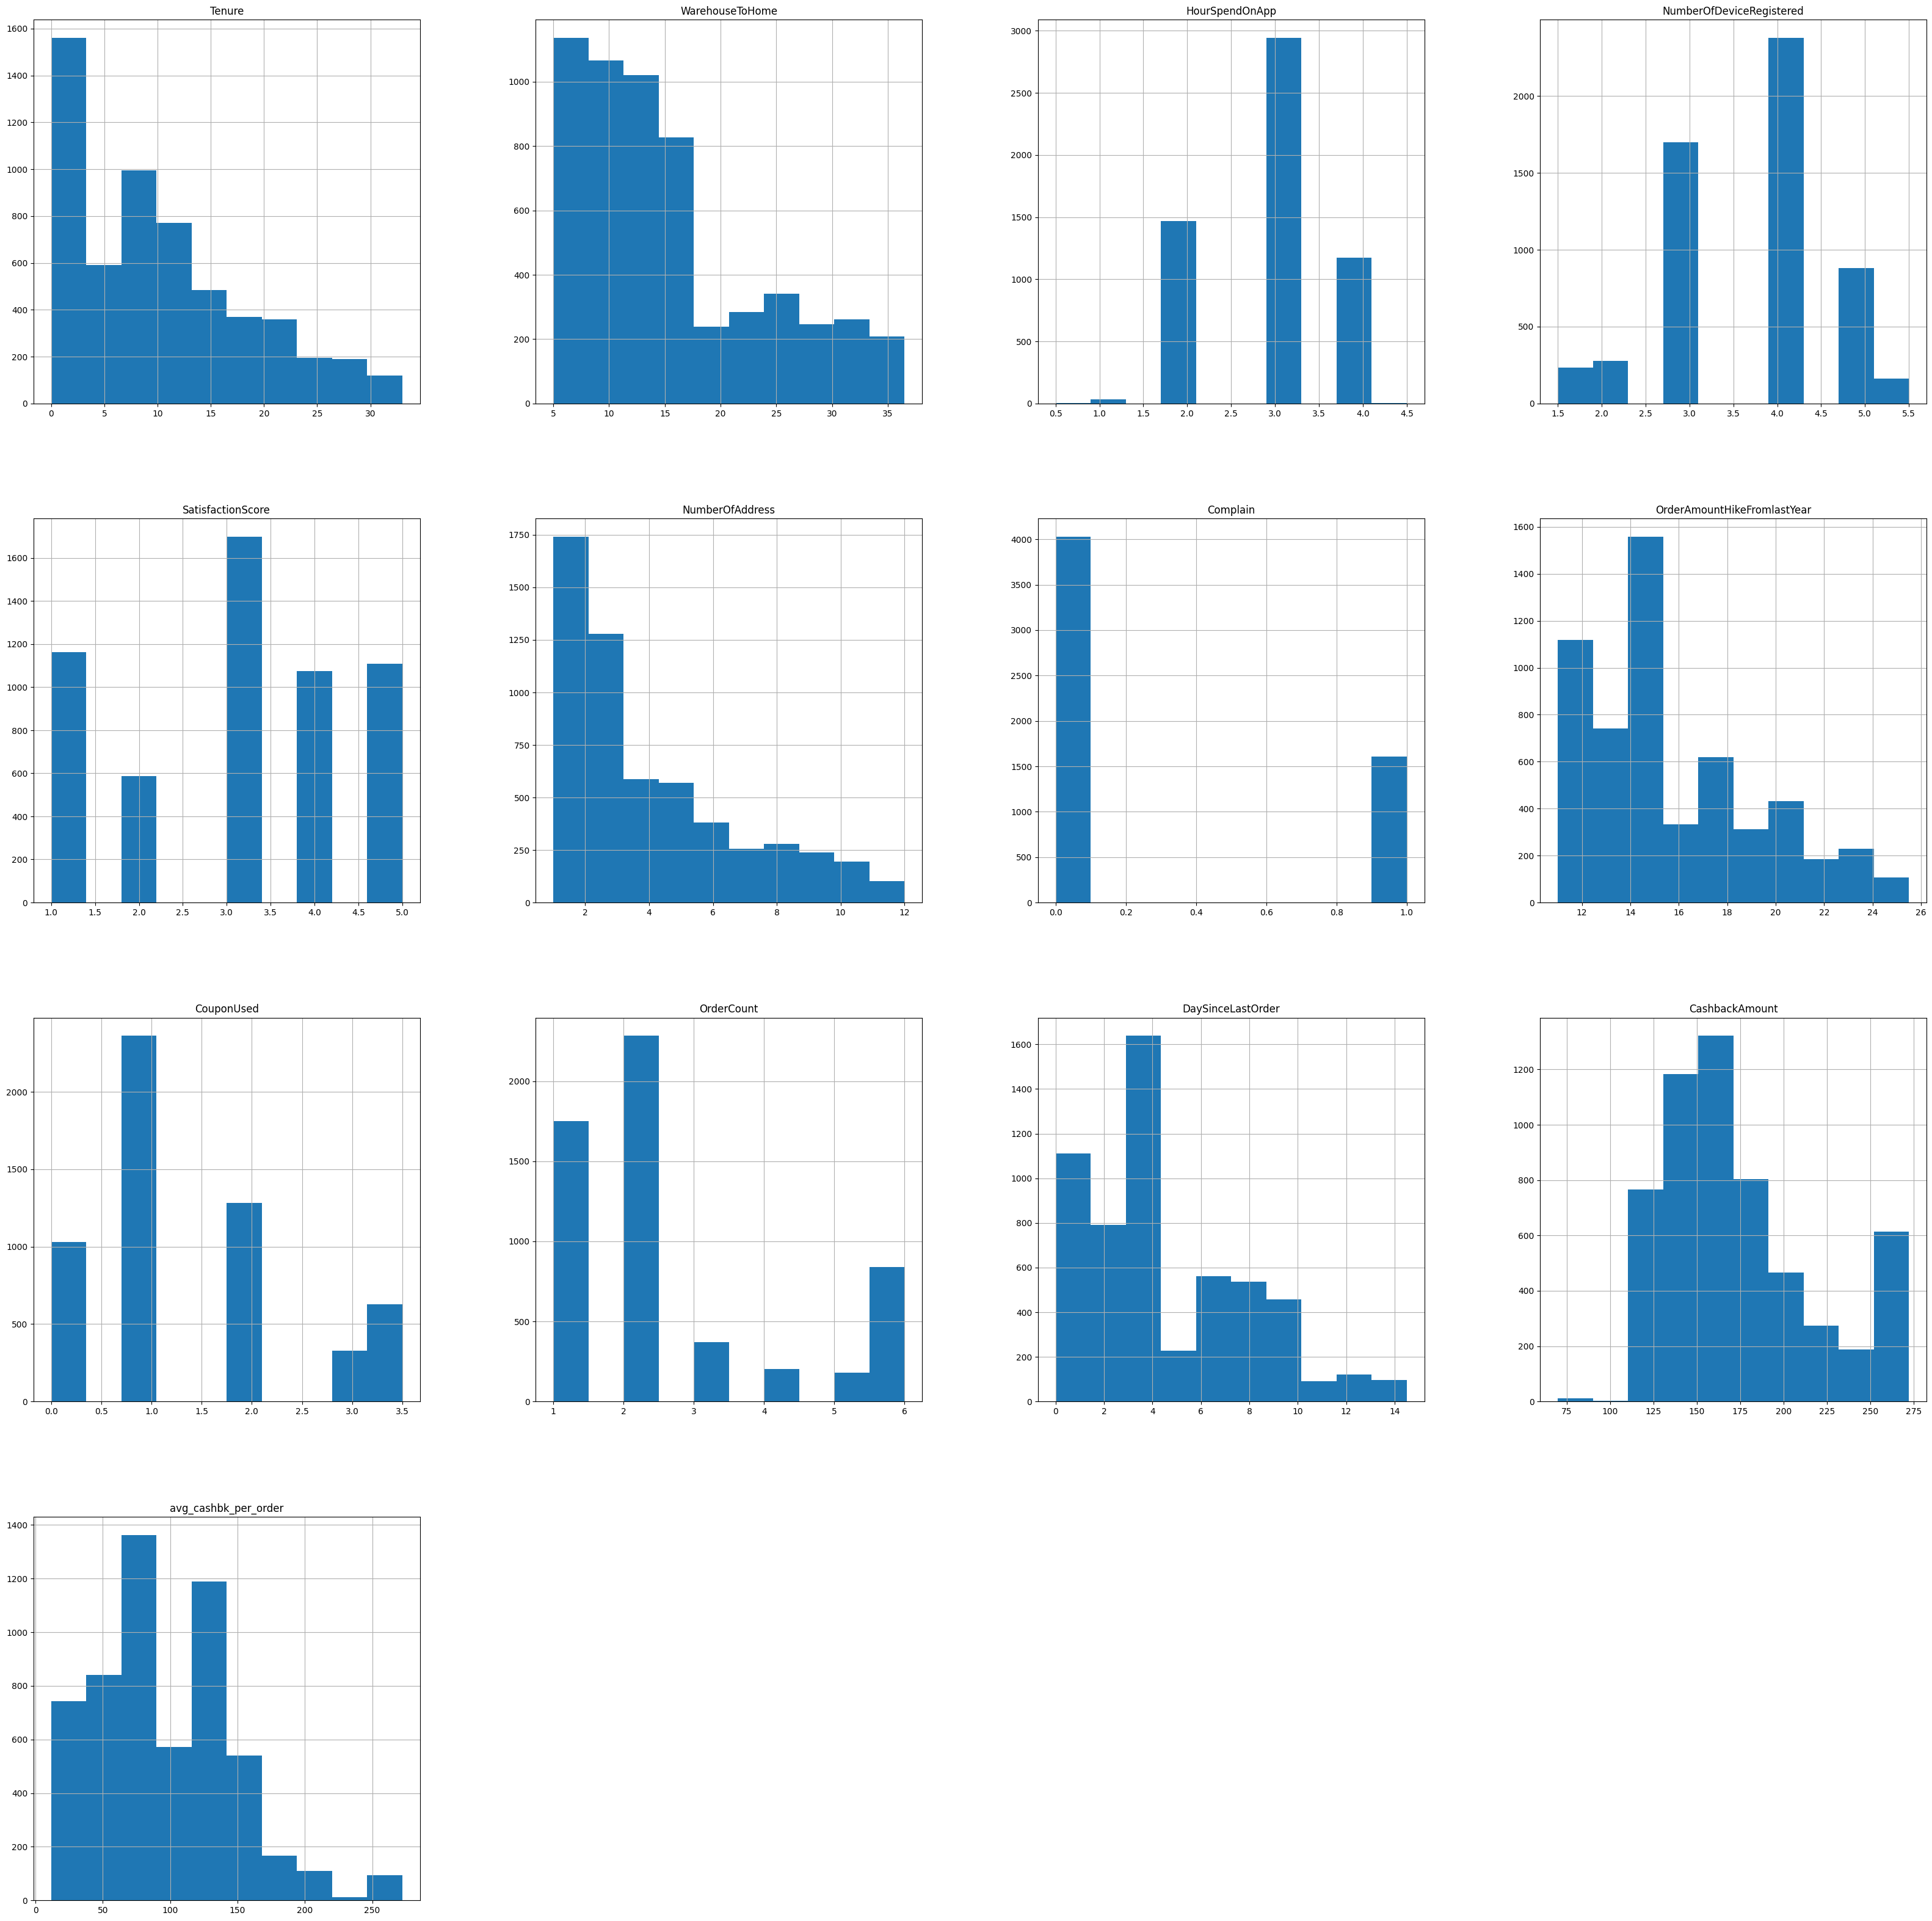

In [ ]:
df[num].hist(figsize=(40,40))

<ipython-input-27-79d117302e96>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], ax=subplot)
<ipython-input-27-79d117302e96>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], ax=subplot)
<ipython-input-27-79d117302e96>:3: UserWarning: 

`distplot` is a deprecated function and will b

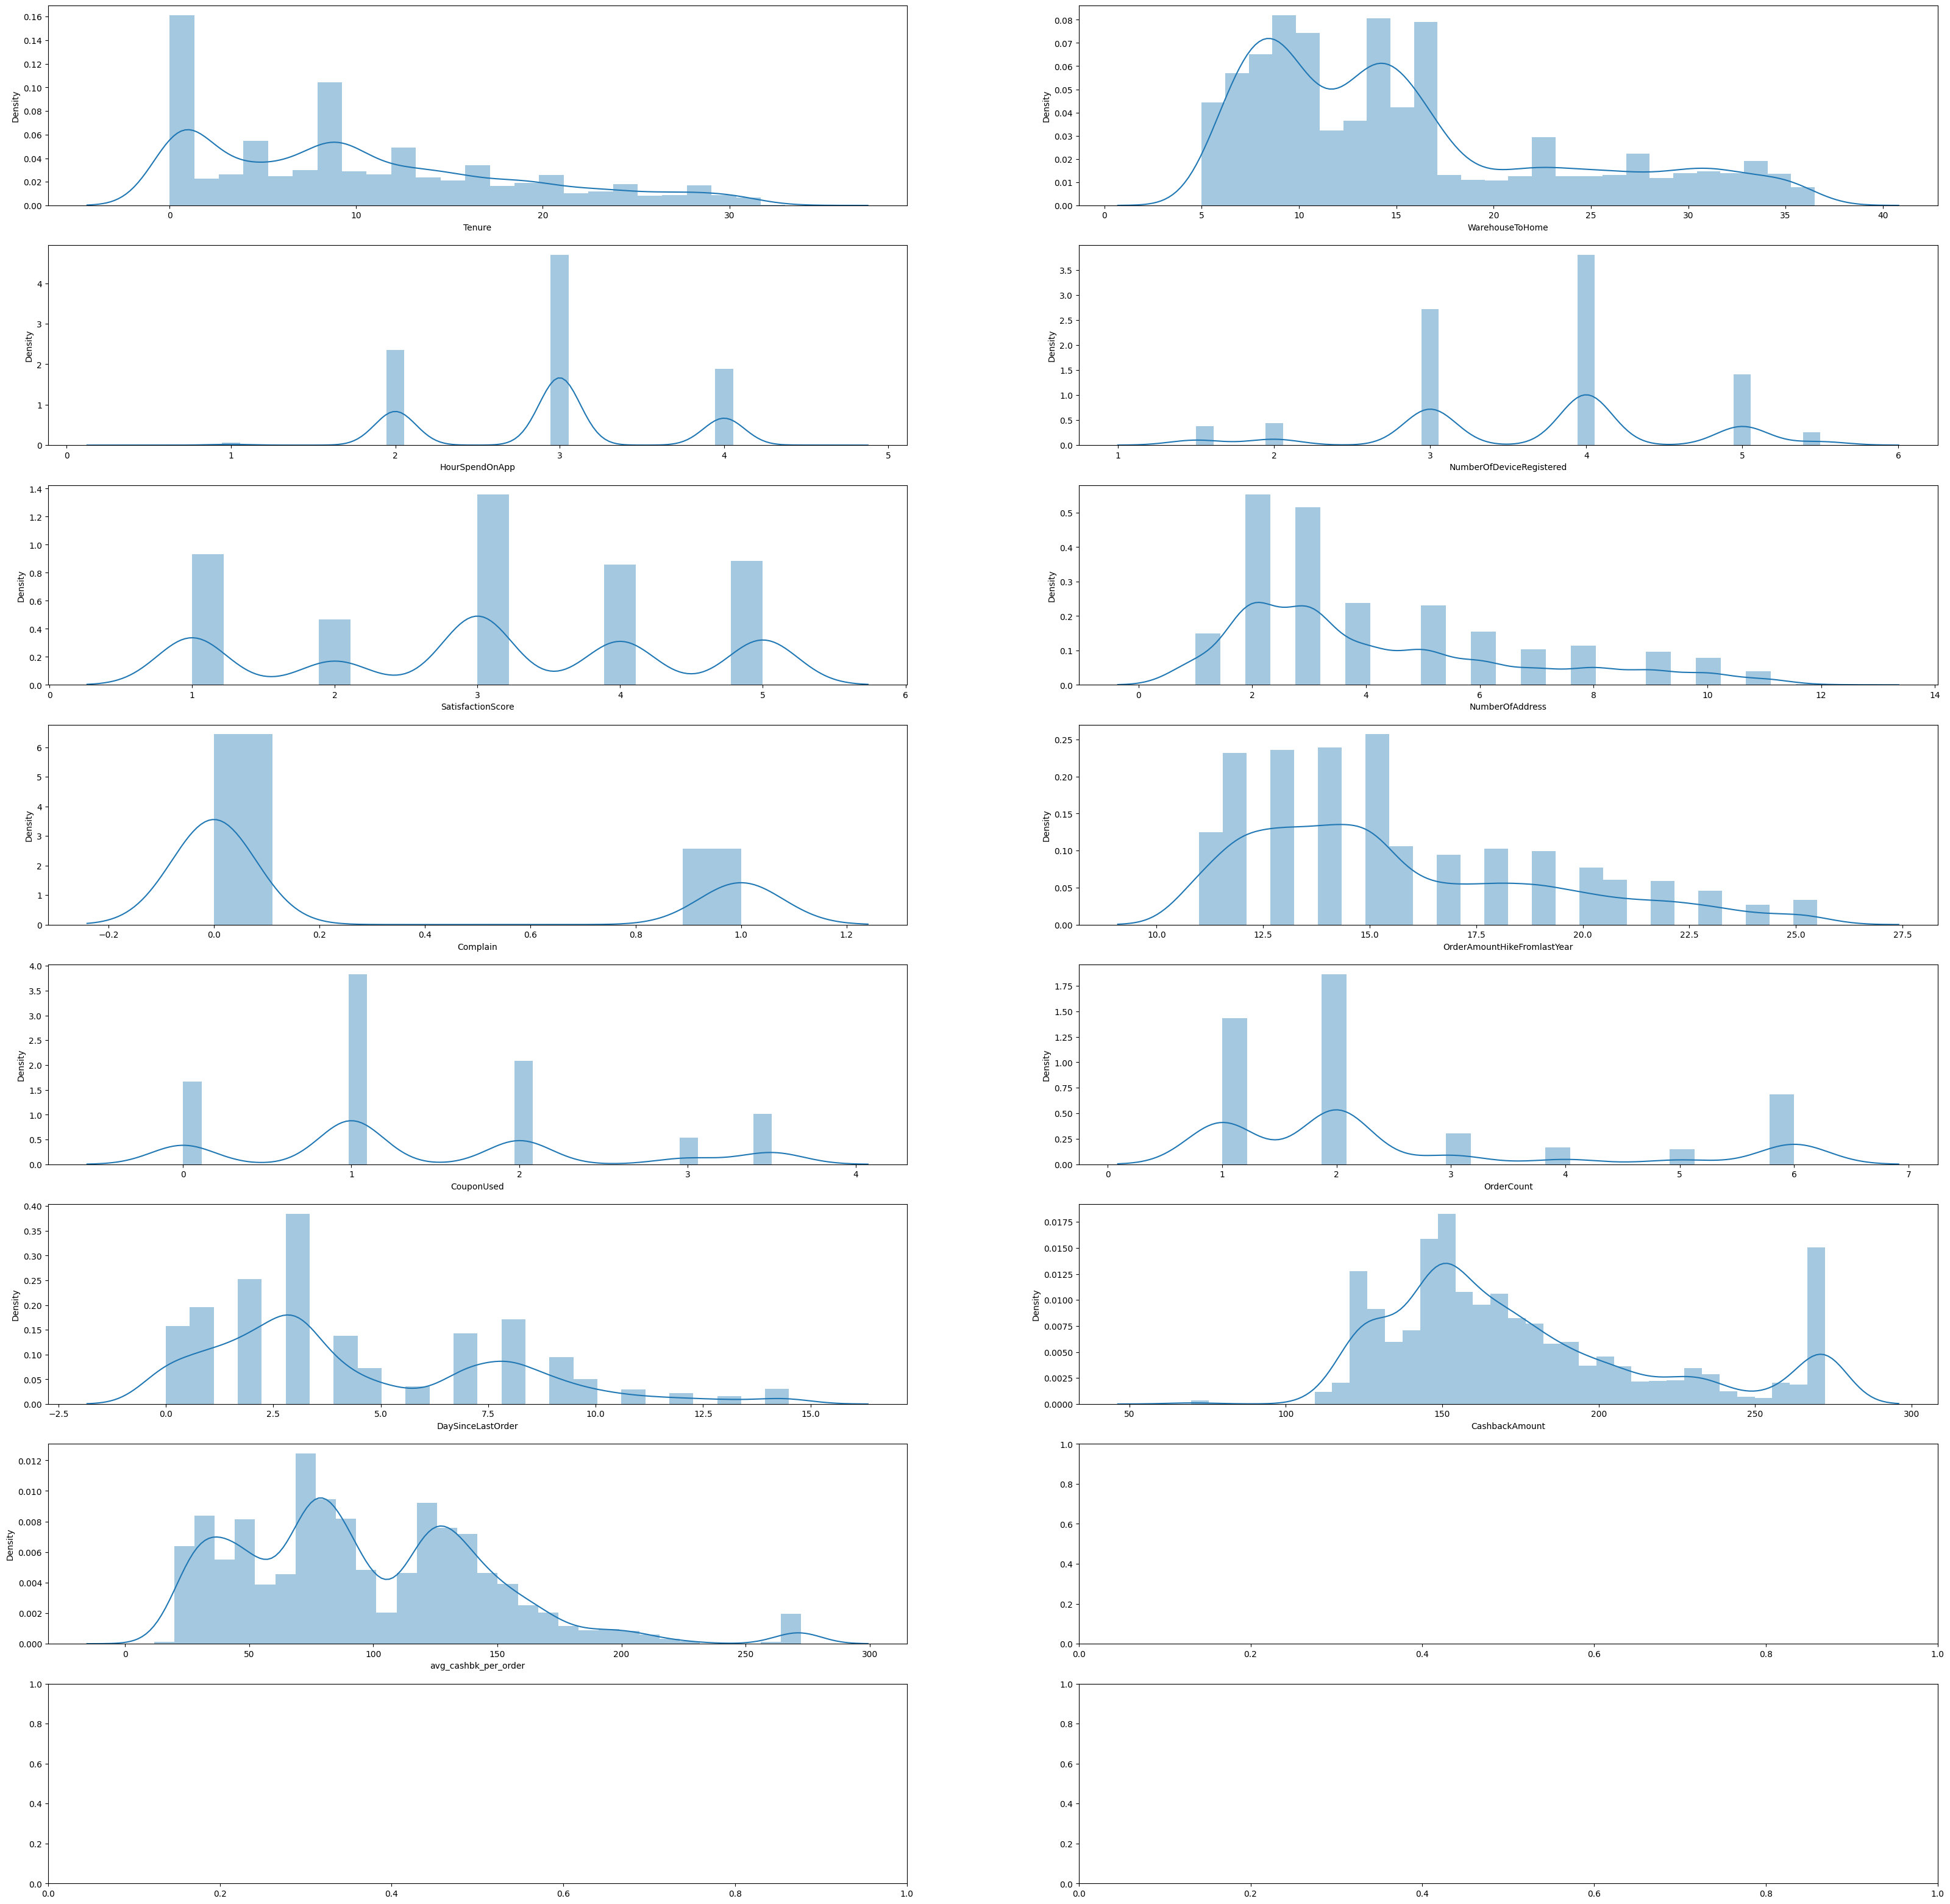

In [ ]:
fig, ax = plt.subplots(8, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df[i], ax=subplot)

### **EDA - Bivariate Analysis**

<ipython-input-28-c81e52776797>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

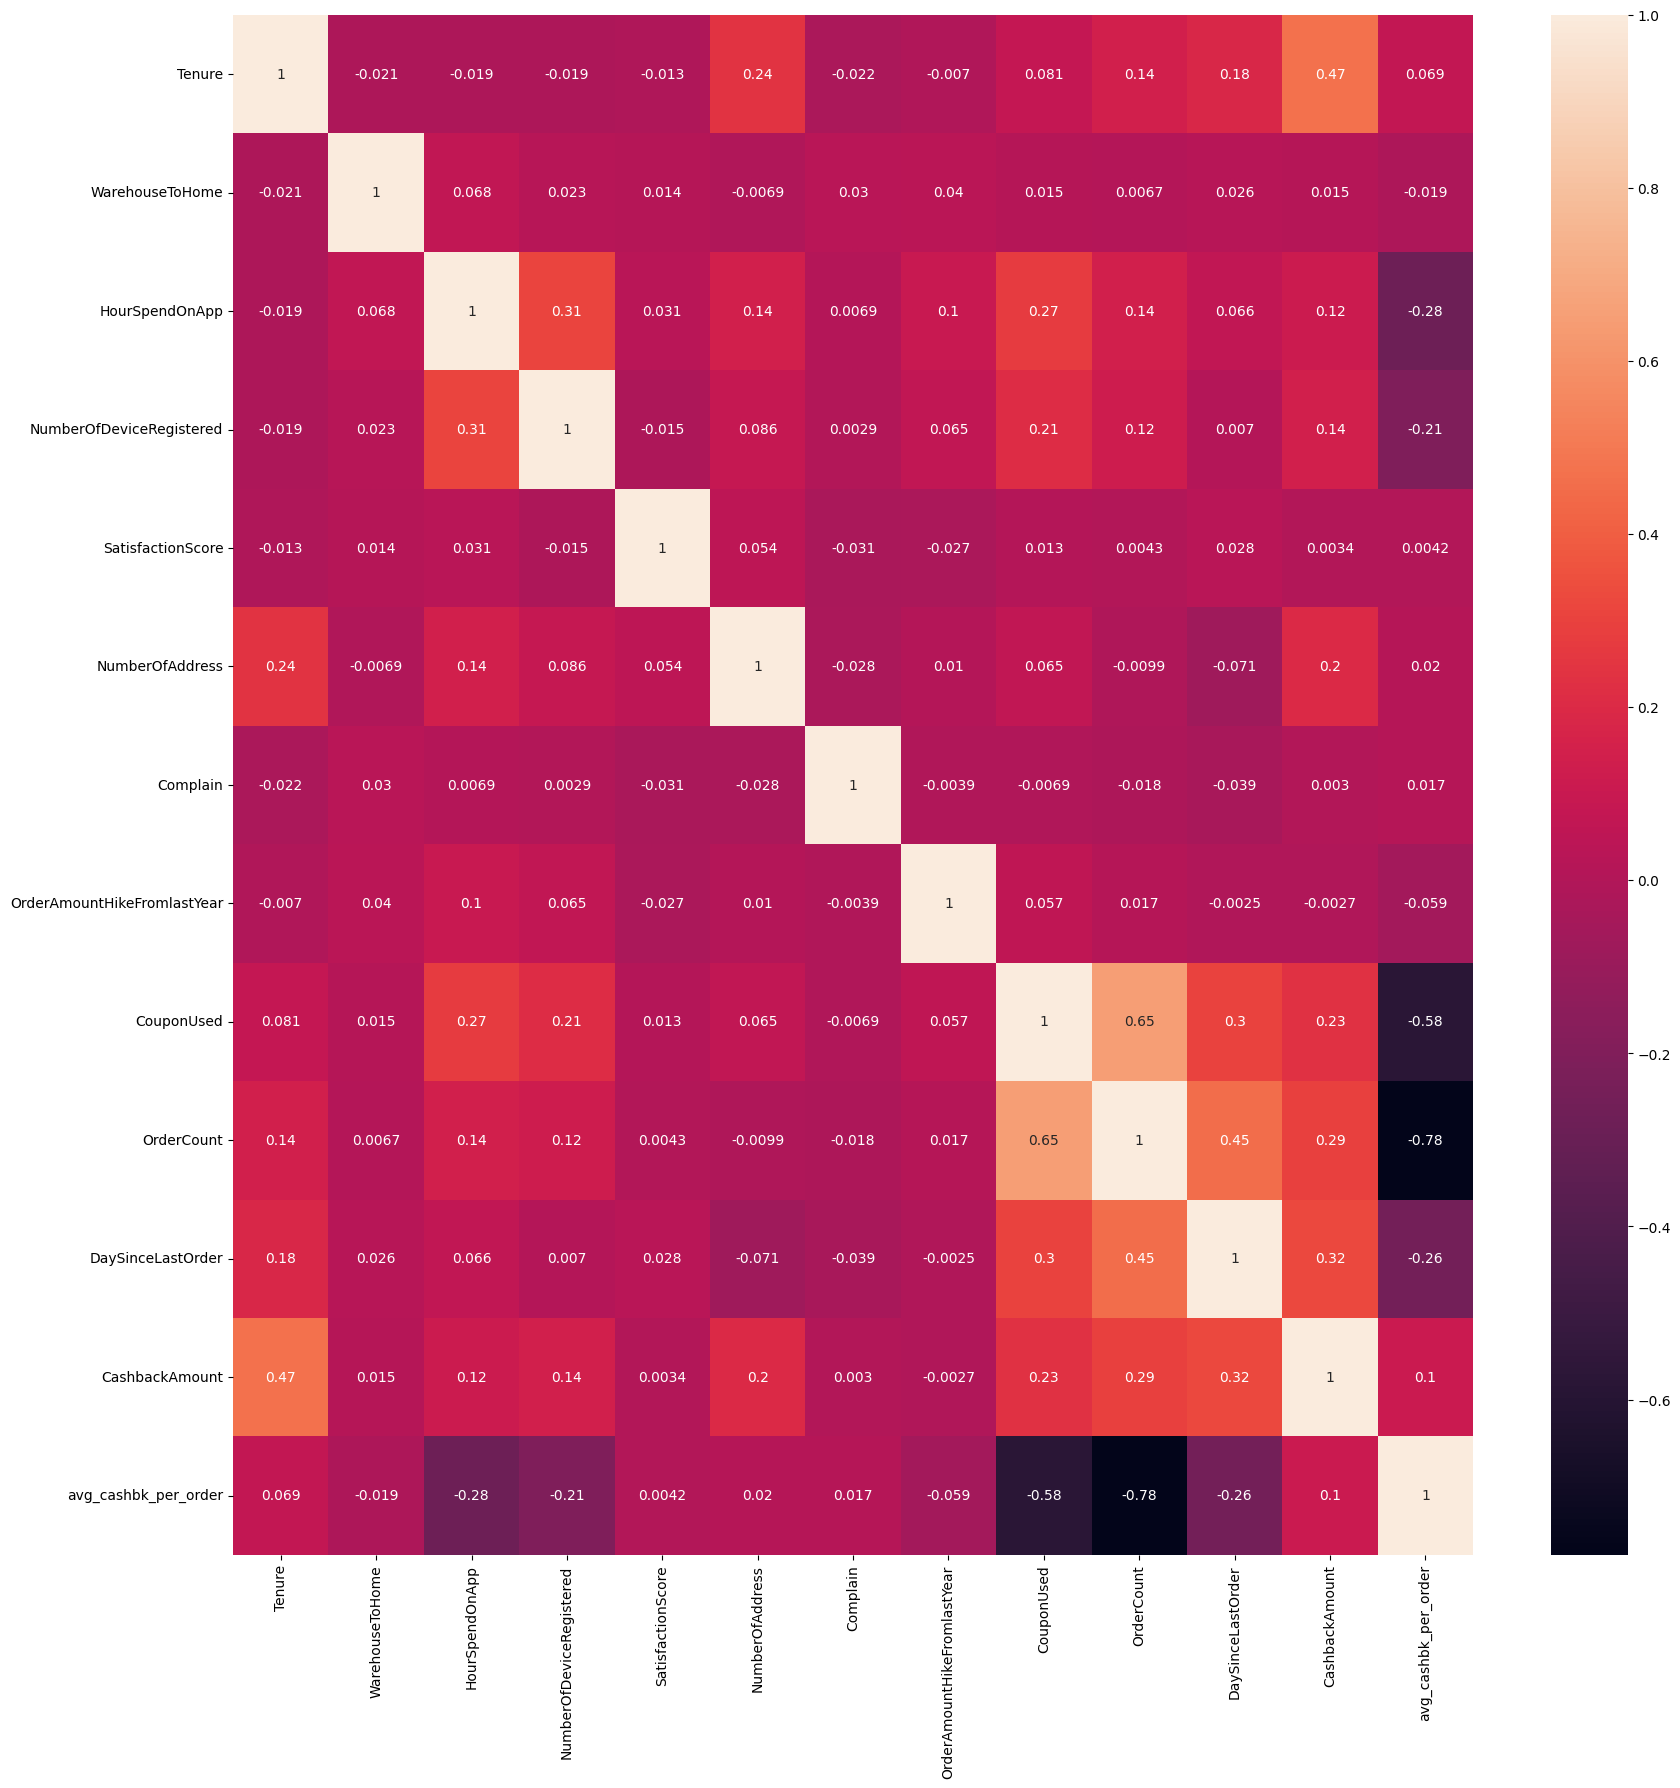

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

### **One Hot coding and Scaling of the data**

In [ ]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60


In [ ]:
df_encoded=df.copy()
df_encoded.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60


In [ ]:
df_encoded = pd.get_dummies(df_encoded,drop_first=True)

<ipython-input-31-6e2f7b354839>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df_encoded,drop_first=True)
<ipython-input-31-6e2f7b354839>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df_encoded,drop_first=True)


In [ ]:
df_encoded.head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,9.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,...,0,1,1,0,0,1,0,0,0,1
2,9.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,...,0,0,1,0,0,1,0,0,0,1
3,0.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,...,0,0,1,0,1,0,0,0,0,1
4,0.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1
5,0.0,22.0,3.0,5.0,5.0,2.0,1.0,22.0,3.5,6.0,...,0,0,0,0,0,0,1,0,0,1
6,9.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,0.0,1.0,...,0,0,1,0,1,0,0,0,0,0
7,9.0,6.0,3.0,3.0,2.0,3.0,1.0,16.0,2.0,2.0,...,0,0,1,0,0,1,0,0,0,0
8,13.0,9.0,3.0,4.0,3.0,2.0,1.0,14.0,0.0,1.0,...,1,0,1,0,0,1,0,0,0,0
9,9.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
features = df_encoded[num]
features = scaler.fit_transform(features)

In [ ]:
scaled_df_encoded = df_encoded.copy()

In [ ]:
scaled_df_encoded[num] = features

In [ ]:
scaled_df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,0,0,0,0,1,0,0,0,0,1
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,0,1,1,0,0,1,0,0,0,1
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,0,0,1,0,0,1,0,0,0,1
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,0,0,1,0,1,0,0,0,0,1
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.014247,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5626,0.347609,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,...,0,0,1,0,0,0,0,0,1,0
5627,-1.099814,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5628,1.553794,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,...,0,0,1,0,1,0,0,0,1,0


### **Hierarchical Clustering**

In [ ]:
scaled_df_encoded_h = scaled_df_encoded.copy()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
link_method=linkage(scaled_df_encoded_h,method = 'average')

In [ ]:
link_method

array([[1.00000000e+00, 1.34700000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 1.35900000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.10000000e+01, 1.39500000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.12530000e+04, 1.12540000e+04, 6.13078020e+00, 5.53000000e+03],
       [1.12550000e+04, 1.12560000e+04, 6.23700127e+00, 5.62600000e+03],
       [1.04360000e+04, 1.12570000e+04, 6.61935699e+00, 5.63000000e+03]])

In [ ]:
labellist = np.array(scaled_df_encoded_h.Churn_1)
labellist

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
len(labellist)

5630

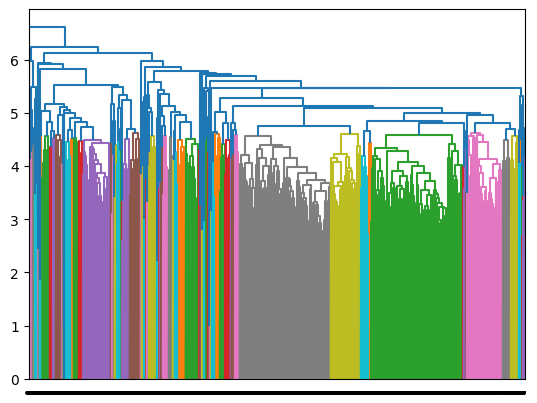

In [ ]:
dend = dendrogram(link_method,labels=labellist)

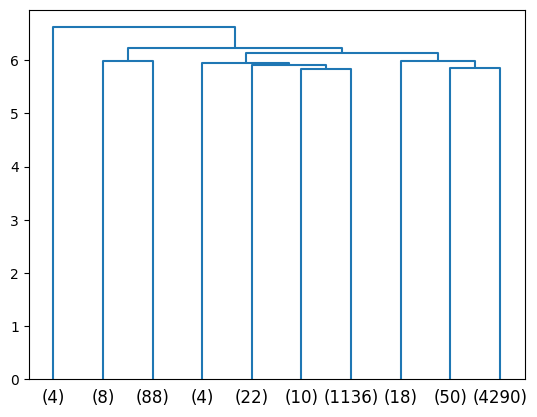

In [ ]:
dend = dendrogram(link_method,
                  labels=labellist,
                 truncate_mode='lastp',
                 p=10)

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
clusters_max = fcluster(link_method,4,criterion = 'maxclust')
clusters_max

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [ ]:
scaled_df_encoded_h['clusters_max'] = clusters_max

In [ ]:
scaled_df_encoded_h.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,clusters_max
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,0,0,0,1,0,0,0,0,1,4
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,1,1,0,0,1,0,0,0,1,4
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,0,1,0,0,1,0,0,0,1,4
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,0,1,0,1,0,0,0,0,1,4
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,0,1,0,0,1,0,0,0,1,4


In [ ]:
df_h = df.copy()

In [ ]:
df_h['clusters_max'] = clusters_max

In [ ]:
aggdata_max = scaled_df_encoded_h.iloc[:,:].groupby('clusters_max').median()
aggdata_max['freq'] = scaled_df_encoded_h.clusters_max.value_counts().sort_index()
aggdata_max

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,freq
clusters_max,,,,,,,,,,,,,,,,,,,,,
1,-0.195175,-0.869718,0.803344,1.650363,0.676207,-0.277114,1.584290,-0.047919,-0.411136,-0.596511,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4
2,1.553794,1.911971,0.092878,-0.738345,-0.772992,-0.081410,1.584290,0.091648,-0.411136,-0.304276,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,96
3,0.106371,-0.313381,0.092878,0.323303,-0.048392,-0.472817,-0.631198,-0.187486,1.455929,2.033597,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1172
4,-0.255484,-0.189750,0.092878,0.323303,-0.048392,-0.472817,-0.631198,-0.187486,-0.411136,-0.304276,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4358


In [ ]:
aggdata_max_2 = df_h.iloc[:,:].groupby('clusters_max').mean()
aggdata_max_2['freq'] = df_h.clusters_max.value_counts().sort_index()
aggdata_max_2

<ipython-input-54-452edf654942>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggdata_max_2 = df_h.iloc[:,:].groupby('clusters_max').mean()


,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order,freq
clusters_max,,,,,,,,,,,,,,
1,8.500000,8.500000,3.500000,5.250000,4.000000,3.500000,1.000000,15.50000,1.250000,1.500000,11.500000,272.326250,204.244687,4
2,21.041667,30.208333,2.958333,3.276042,2.312500,3.958333,0.687500,16.62500,1.510417,2.656250,8.395833,232.486263,105.839287,96
3,11.938567,15.106655,2.917235,3.700512,3.059727,3.751706,0.242321,15.62116,2.563993,5.489761,7.363481,192.997217,36.283174,1172
4,9.389399,15.333180,2.938274,3.701927,3.084442,4.336852,0.286829,15.66441,1.136875,1.720055,3.546122,169.223195,112.124791,4358


### **K means Clustering**

In [ ]:
scaled_df_encoded_k= scaled_df_encoded.copy()

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
k_means = KMeans(n_clusters = 2)

In [ ]:
k_means.fit(scaled_df_encoded_k)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
k_means.labels_

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
k_means.inertia_

77898.33799976068

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df_encoded_k)
k_means.inertia_


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


71780.3992110077

In [ ]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df_encoded_k)
k_means.inertia_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


67757.64344625486

In [ ]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df_encoded_k)
k_means.inertia_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


65593.18486259866

In [ ]:
wss =[] 
for i in range(1,20):
    k_means = KMeans(n_clusters=i)
    k_means.fit(scaled_df_encoded_k)
    wss.append(k_means.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
wss

[89242.39982238013,
 77898.33799976068,
 71780.40848221649,
 67757.64344625486,
 65593.87419522353,
 63742.66961957437,
 62359.832412997435,
 60756.92012660742,
 59437.29771386598,
 58687.550766259104,
 57438.02238613749,
 56711.16904295259,
 55921.909269564974,
 55237.10963678903,
 54496.047288000555,
 53884.55092387048,
 53437.92796167992,
 53003.175596484645,
 52404.45974024922]

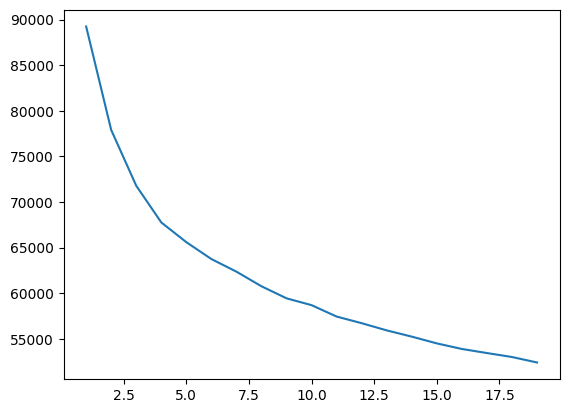

In [ ]:
plt.plot(range(1,20), wss)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
Sil_Score = []
for i in range(2,20):
  k_means = KMeans(n_clusters=i)
  k_means.fit(scaled_df_encoded_k)
  labels = k_means.labels_
  ss = silhouette_score(scaled_df_encoded_k,labels)
  Sil_Score.append(ss)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
Sil_Score

[0.11633122529618131,
 0.10081848767083468,
 0.1015234118053477,
 0.09140457540303658,
 0.08451036336739029,
 0.08070976661695523,
 0.08115039669251234,
 0.07930750700327789,
 0.07582303898575038,
 0.0760501816296825,
 0.0667882428580053,
 0.07380612403139884,
 0.07164180092105564,
 0.07142824629075525,
 0.06514775397476368,
 0.06634716005834679,
 0.0697185479688968,
 0.06641267514540154]

In [ ]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df_encoded_k)
labels = k_means.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
scaled_df_encoded_k["Clus_kmeans"] = labels
scaled_df_encoded_k.head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Clus_kmeans
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,0,0,0,1,0,0,0,0,1,3
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,1,1,0,0,1,0,0,0,1,3
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,0,1,0,0,1,0,0,0,1,3
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,0,1,0,1,0,0,0,0,1,3
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,0,1,0,0,1,0,0,0,1,3
5,-1.220433,0.799295,0.092878,1.384951,1.400807,-0.864224,1.584290,1.766454,1.922695,2.033597,...,0,0,0,0,0,1,0,0,1,0
6,-0.134866,-0.560642,-1.328053,-0.738345,-0.772992,-0.081410,-0.631198,-0.466620,-1.344668,-0.888745,...,0,1,0,1,0,0,0,0,0,3
7,-0.134866,-1.178795,0.092878,-0.738345,-0.772992,-0.472817,1.584290,0.091648,0.522397,-0.304276,...,0,1,0,0,1,0,0,0,0,3
8,0.347609,-0.807903,0.092878,0.323303,-0.048392,-0.864224,1.584290,-0.466620,-1.344668,-0.888745,...,0,1,0,0,1,0,0,0,0,3
9,-0.134866,1.911971,-1.328053,1.384951,-0.048392,-0.864224,-0.631198,-1.024889,-0.411136,-0.888745,...,0,1,0,0,1,0,0,0,1,3


In [ ]:
aggdata_k = scaled_df_encoded_k.iloc[:,:].groupby('Clus_kmeans').mean()
aggdata_k['freq'] = scaled_df_encoded_k.Clus_kmeans.value_counts().sort_index()
aggdata_k

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,freq
Clus_kmeans,,,,,,,,,,,,,,,,,,,,,
0,0.208186,-0.010427,0.026788,0.008283,0.005282,-0.166029,-0.052995,-0.024718,1.143545,1.732049,...,0.068906,0.578811,0.100775,0.403962,0.058570,0.100775,0.090439,0.572782,0.260121,1161
1,-0.345036,0.075969,0.684805,0.587569,0.007948,0.188686,0.005217,0.181026,0.138550,-0.181828,...,0.072894,0.614471,0.000000,0.401728,0.016739,0.496760,0.000000,0.505400,0.355832,1852
2,1.270535,0.021459,-0.149139,-0.049301,-0.012864,0.429692,0.083476,-0.120494,-0.120235,-0.308047,...,0.069677,0.548387,0.375484,0.092903,0.000000,0.003871,0.205161,0.575484,0.237419,775
3,-0.318871,-0.078838,-0.642658,-0.575236,-0.005908,-0.265852,-0.006964,-0.115732,-0.809483,-0.779276,...,0.078719,0.623779,0.001086,0.415309,0.385451,0.125407,0.000000,0.509772,0.353420,1842


In [ ]:
df_k = df.copy()

In [ ]:
df_k['Clus_kmeans'] = scaled_df_encoded_k["Clus_kmeans"]

In [ ]:
aggdata_k2 = df_k.iloc[:,:].groupby('Clus_kmeans').mean()
aggdata_k2['freq'] = df_k.Clus_kmeans.value_counts().sort_index()
aggdata_k2


<ipython-input-75-bbada954378f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggdata_k2 = df_k.iloc[:,:].groupby('Clus_kmeans').mean()


,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order,freq
Clus_kmeans,,,,,,,,,,,,,,
0,11.844100,15.450474,2.953488,3.703273,3.074074,3.783807,0.260982,15.583118,2.665375,5.484065,7.664083,192.135011,36.431845,1161
1,7.257559,16.149298,3.416577,4.248920,3.077754,4.690065,0.287257,16.320194,1.588823,2.209503,3.548596,167.744569,79.228327,1852
2,20.651613,15.708387,2.829677,3.649032,3.049032,5.305806,0.322581,15.240000,1.311613,1.993548,5.440000,242.167250,142.262221,775
3,7.474484,14.897123,2.482356,3.153637,3.058632,3.528773,0.281759,15.257058,0.573290,1.187296,2.850163,144.225895,131.845720,1842


### **Building Classification models**

In [ ]:
scaled_df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,0,0,0,0,1,0,0,0,0,1
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,0,1,1,0,0,1,0,0,0,1
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,0,0,1,0,0,1,0,0,0,1
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,0,0,1,0,1,0,0,0,0,1
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.014247,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5626,0.347609,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,...,0,0,1,0,0,0,0,0,1,0
5627,-1.099814,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5628,1.553794,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
scaled_df_encoded_h['clusters_max'] = scaled_df_encoded_h['clusters_max'].astype('object')

In [ ]:
scaled_df_encoded_h1 = pd.get_dummies(scaled_df_encoded_h, drop_first=True)

<ipython-input-78-aa39f08e0294>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  scaled_df_encoded_h1 = pd.get_dummies(scaled_df_encoded_h, drop_first=True)


### **Correcting the imbalanced data with the help of SMOTE oversampling**

In [ ]:
X=scaled_df_encoded_h1.drop(['Churn_1'],axis=1)
y=scaled_df_encoded_h1['Churn_1']


In [ ]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, the shape of X: (5630, 34)
Before OverSampling, the shape of y: (5630,) 

Before OverSampling, counts of label '1': 948
Before OverSampling, counts of label '0': 4682


In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X, y.ravel())


In [ ]:
print('After OverSampling, the shape of X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of X: (9364, 34)
After OverSampling, the shape of y: (9364,) 

After OverSampling, counts of label '1': 4682
After OverSampling, counts of label '0': 4682


In [ ]:
X_res=pd.DataFrame(X_res)
#Renaming column name of Target variable
y_res=pd.DataFrame(y_res)
y_res.columns = ['Churn_1']
scaled_df_encoded_h1_smote = pd.concat([X_res,y_res], axis=1)

### **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = scaled_df_encoded_h1_smote.drop(['Churn_1'],axis=1)
y = scaled_df_encoded_h1_smote['Churn_1']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=42)

### **Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
?LogisticRegression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
ytrain_predict = model_lr.predict(X_train)
ytest_predict = model_lr.predict(X_test)

In [ ]:
ytest_predict_prob=model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.981292,0.018708
1,0.995808,0.004192
2,0.092582,0.907418
3,0.194875,0.805125
4,0.027578,0.972422


In [ ]:
model_lr.score(X_train, y_train)

0.8494945180122455

AUC: 0.931


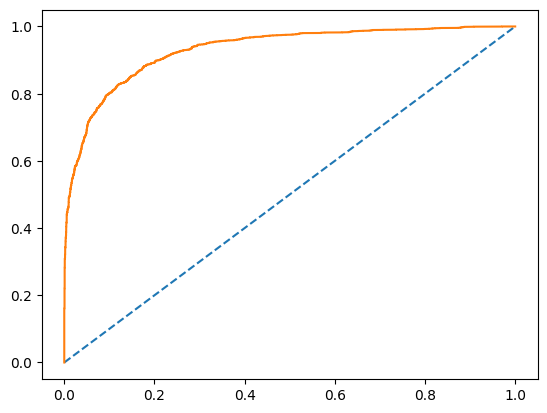

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
model_lr.score(X_test, y_test)

0.8479282357966681

AUC: 0.931


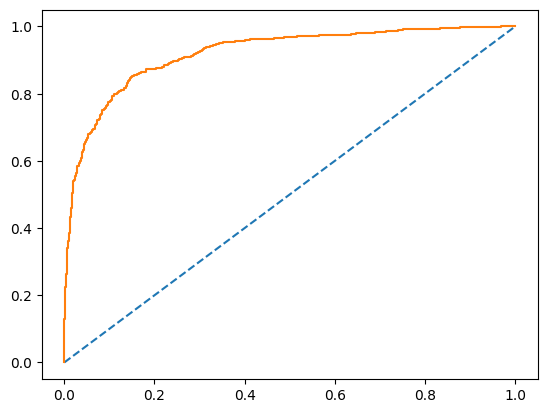

In [ ]:
probs = model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<Axes: >

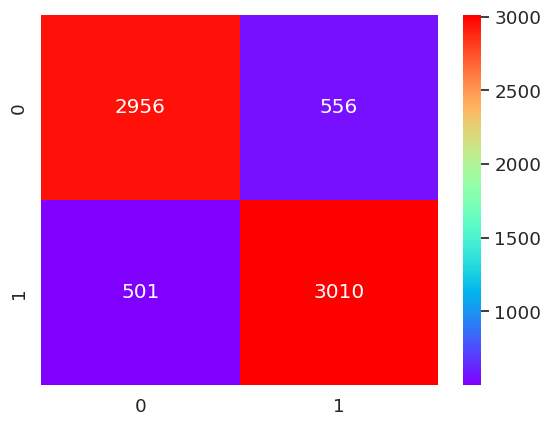

In [ ]:
cm_lr = confusion_matrix(y_train, ytrain_predict)
cm_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = 'd', cmap ='rainbow')

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3512
           1       0.84      0.86      0.85      3511

    accuracy                           0.85      7023
   macro avg       0.85      0.85      0.85      7023
weighted avg       0.85      0.85      0.85      7023



<Axes: >

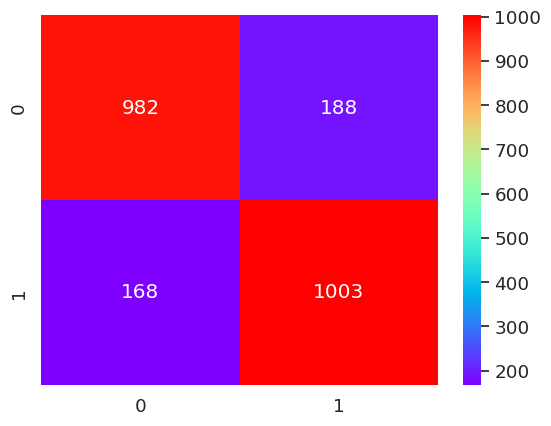

In [ ]:
cm_test_lr=confusion_matrix(y_test, ytest_predict)
cm_test_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lr,annot = True,fmt = 'd', cmap='rainbow')

In [ ]:
test_acc=model_lr.score(X_test,y_test)
test_acc

0.8479282357966681

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1170
           1       0.84      0.86      0.85      1171

    accuracy                           0.85      2341
   macro avg       0.85      0.85      0.85      2341
weighted avg       0.85      0.85      0.85      2341



### **Linear Discriminant Analysis**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()

In [ ]:
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

0.8497792965968959
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      3512
           1       0.84      0.87      0.85      3511

    accuracy                           0.85      7023
   macro avg       0.85      0.85      0.85      7023
weighted avg       0.85      0.85      0.85      7023



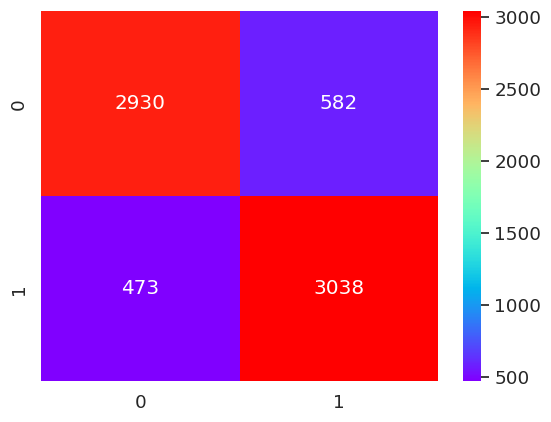

In [ ]:
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
#confusion matrix training Data
cm_train_lda = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_lda, annot = True,fmt = 'd', cmap='rainbow')
print(metrics.classification_report(y_train, y_train_predict))

0.8457923964117898
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1170
           1       0.83      0.86      0.85      1171

    accuracy                           0.85      2341
   macro avg       0.85      0.85      0.85      2341
weighted avg       0.85      0.85      0.85      2341



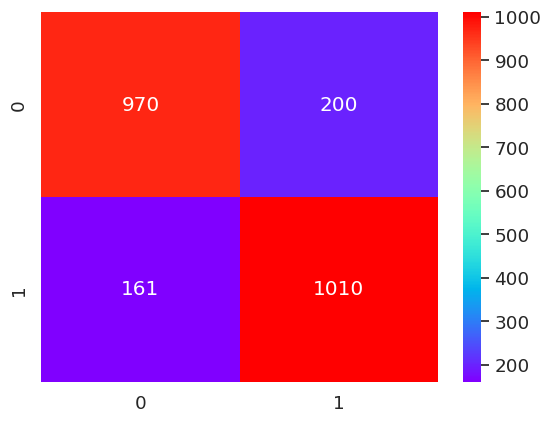

In [ ]:
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
#confusion matrix test Data
cm_test_lda = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lda, annot = True,fmt = 'd', cmap='rainbow')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.930


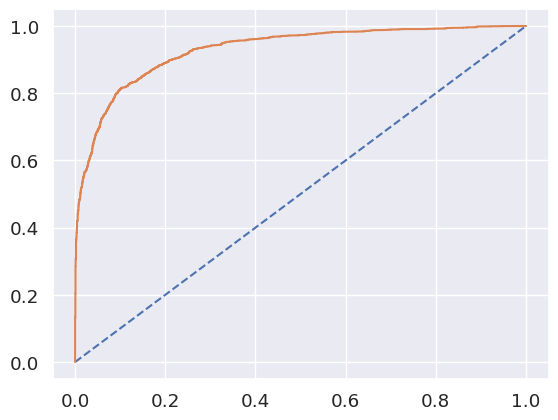

In [ ]:
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.930


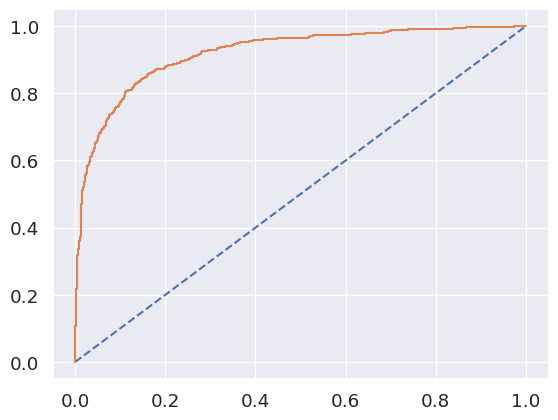

In [ ]:
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### **Decision Tree**

In [ ]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3512
           1       1.00      1.00      1.00      3511

    accuracy                           1.00      7023
   macro avg       1.00      1.00      1.00      7023
weighted avg       1.00      1.00      1.00      7023



<Axes: >

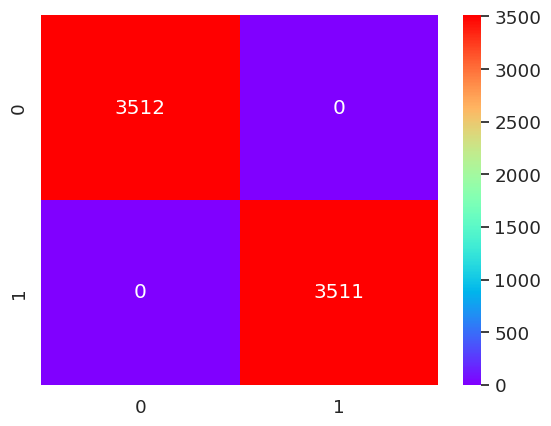

In [ ]:
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_dt = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_dt, annot = True,fmt = 'd', cmap='rainbow')

0.9564288765484835
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1170
           1       0.95      0.96      0.96      1171

    accuracy                           0.96      2341
   macro avg       0.96      0.96      0.96      2341
weighted avg       0.96      0.96      0.96      2341

Confusion Matrix


<Axes: >

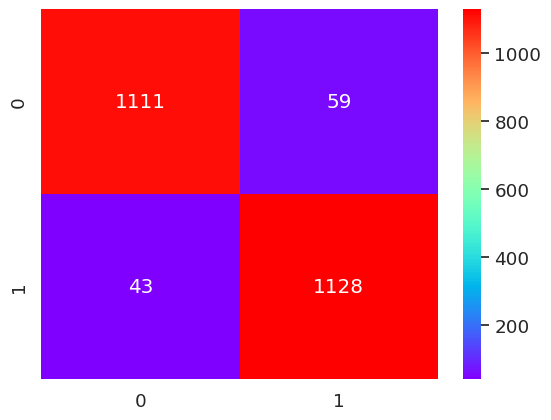

In [ ]:
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_dt = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_dt, annot = True,fmt = 'd', cmap='rainbow')

0.9564288765484835
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1170
           1       0.95      0.96      0.96      1171

    accuracy                           0.96      2341
   macro avg       0.96      0.96      0.96      2341
weighted avg       0.96      0.96      0.96      2341

Confusion Matrix


<Axes: >

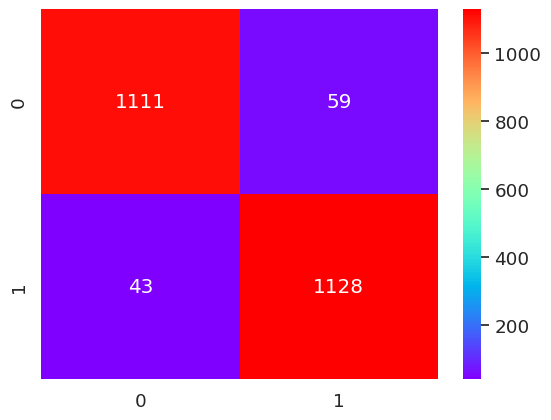

In [ ]:
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_dt = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_dt, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


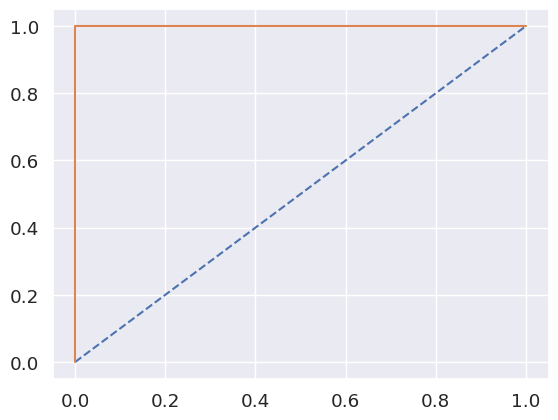

In [ ]:
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 1.000


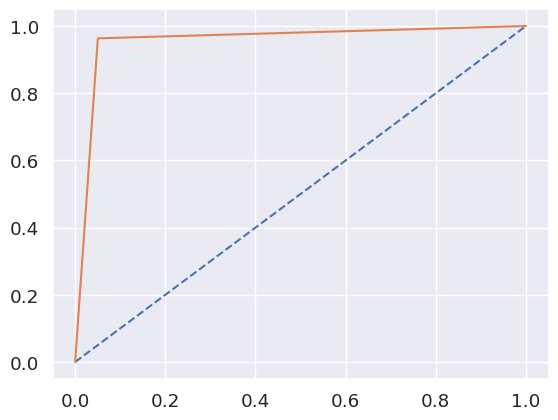

In [ ]:
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3512
           1       1.00      1.00      1.00      3511

    accuracy                           1.00      7023
   macro avg       1.00      1.00      1.00      7023
weighted avg       1.00      1.00      1.00      7023

Confusion Matrix


<Axes: >

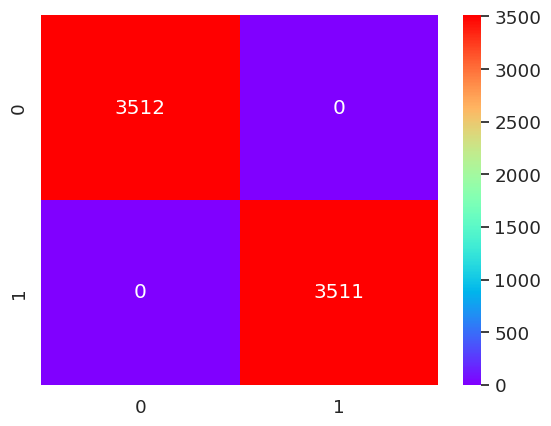

In [ ]:
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_rf = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_rf, annot = True,fmt = 'd', cmap='rainbow')

0.9782144382742418
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1170
           1       0.97      0.98      0.98      1171

    accuracy                           0.98      2341
   macro avg       0.98      0.98      0.98      2341
weighted avg       0.98      0.98      0.98      2341

Confusion Matrix


<Axes: >

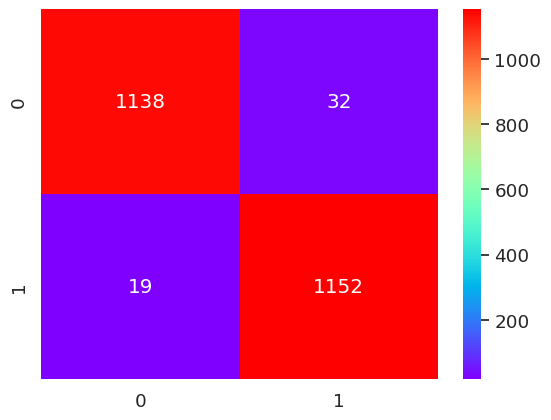

In [ ]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_rf = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_rf, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


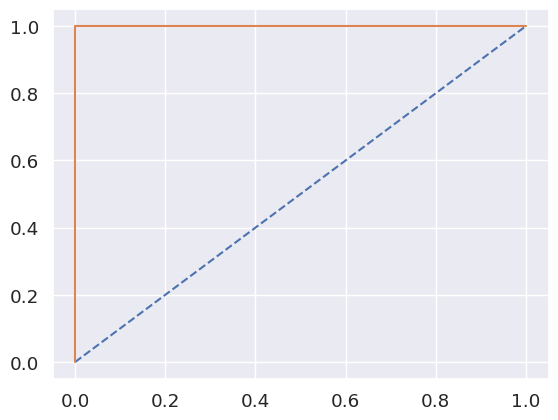

In [ ]:
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 1.000


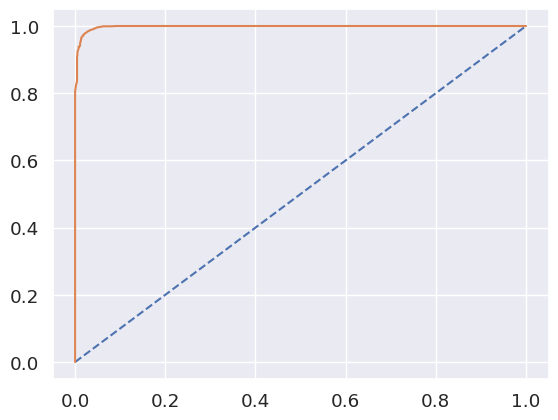

In [ ]:
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### **KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

0.9500213583938488
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3512
           1       0.91      1.00      0.95      3511

    accuracy                           0.95      7023
   macro avg       0.95      0.95      0.95      7023
weighted avg       0.95      0.95      0.95      7023

Confusion Matrix


<Axes: >

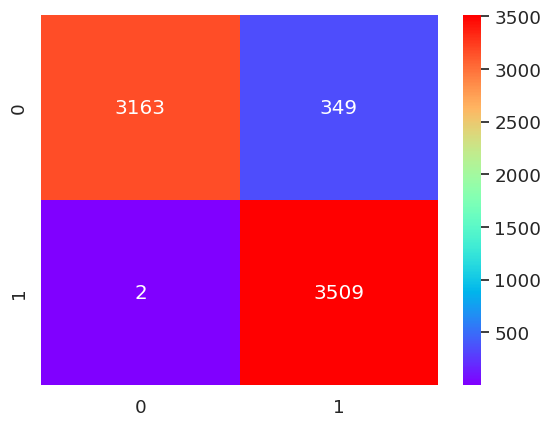

In [ ]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_knn = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_knn, annot = True,fmt = 'd', cmap='rainbow')

0.915420760358821
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      1170
           1       0.86      1.00      0.92      1171

    accuracy                           0.92      2341
   macro avg       0.93      0.92      0.91      2341
weighted avg       0.93      0.92      0.91      2341

Confusion Matrix


<Axes: >

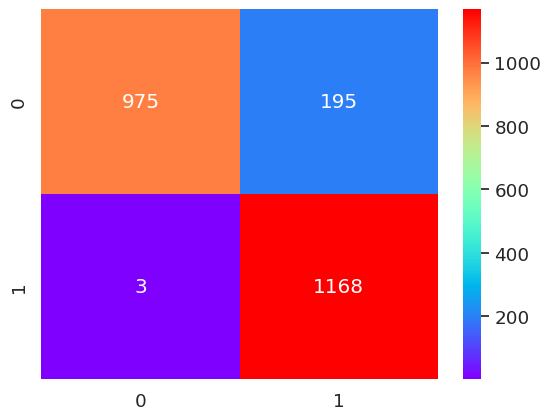

In [ ]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_knn = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_knn, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


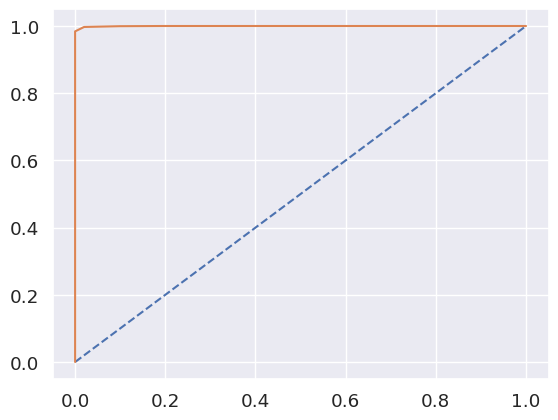

In [ ]:
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 1.000


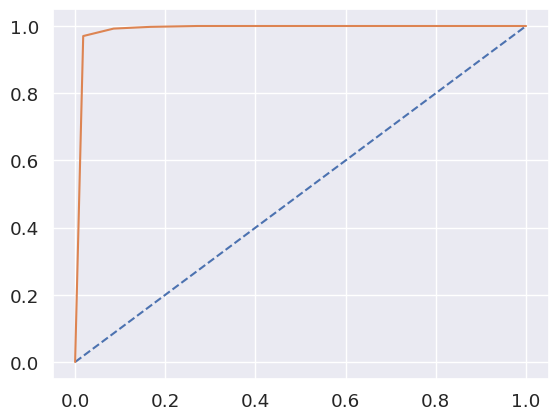

In [ ]:
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### **XGBoost**

In [ ]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

0.9125729745123167
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3512
           1       0.92      0.90      0.91      3511

    accuracy                           0.91      7023
   macro avg       0.91      0.91      0.91      7023
weighted avg       0.91      0.91      0.91      7023

Confusion Matrix


<Axes: >

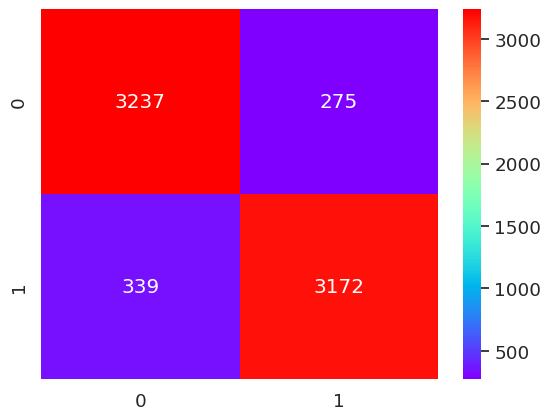

In [ ]:
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_knn = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_knn, annot = True,fmt = 'd', cmap='rainbow')

0.905595899188381
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1170
           1       0.91      0.90      0.91      1171

    accuracy                           0.91      2341
   macro avg       0.91      0.91      0.91      2341
weighted avg       0.91      0.91      0.91      2341

Confusion Matrix


<Axes: >

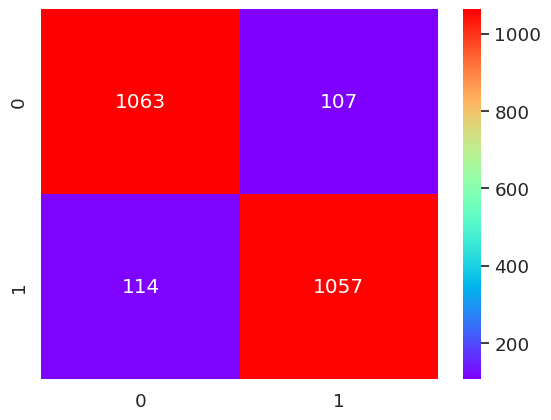

In [ ]:
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_knn = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_knn, annot = True,fmt = 'd', cmap='rainbow')

AUC: 0.976


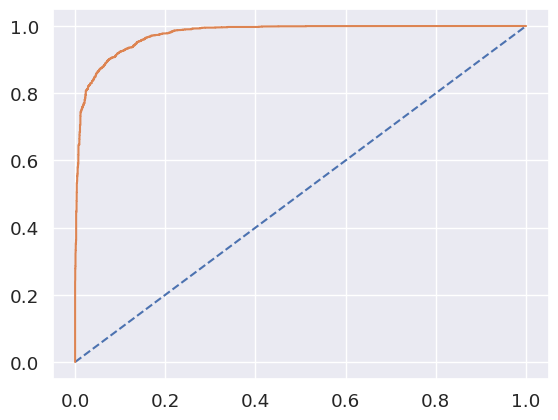

In [ ]:
probs = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.976


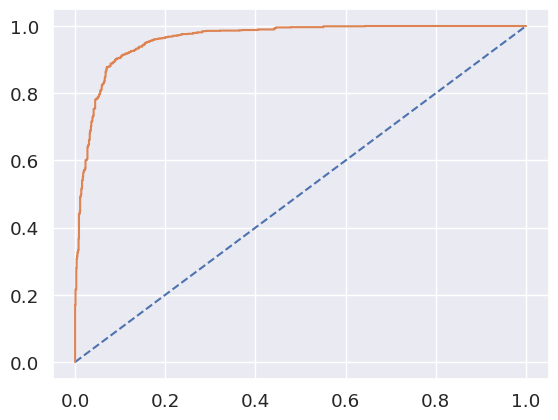

In [ ]:
probs = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)


### **Gaussian Naives Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

0.6951445251317101
              precision    recall  f1-score   support

           0       0.79      0.53      0.64      3512
           1       0.65      0.86      0.74      3511

    accuracy                           0.70      7023
   macro avg       0.72      0.70      0.69      7023
weighted avg       0.72      0.70      0.69      7023

Confusion Matrix


<Axes: >

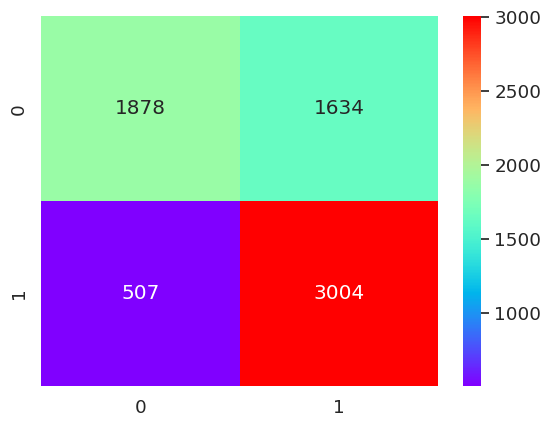

In [ ]:
y_train_predict = gnb.predict(X_train)
model_score = gnb.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_rf = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_rf, annot = True,fmt = 'd', cmap='rainbow')

0.6881674498077744
              precision    recall  f1-score   support

           0       0.78      0.52      0.63      1170
           1       0.64      0.86      0.73      1171

    accuracy                           0.69      2341
   macro avg       0.71      0.69      0.68      2341
weighted avg       0.71      0.69      0.68      2341

Confusion Matrix


<Axes: >

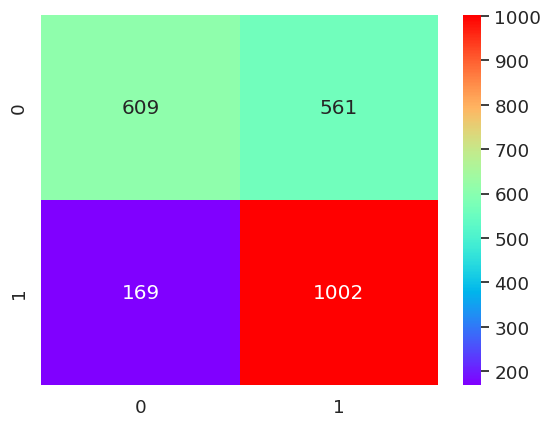

In [ ]:
y_test_predict = gnb.predict(X_test)
model_score = gnb.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_knn = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_knn, annot = True,fmt = 'd', cmap='rainbow')